In [30]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

**Importing the dataset**

In [32]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [33]:
x = df.iloc[:, 2:4].values
y = df.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


**Feature Scaling**

In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

**Fitting Decision Tree Classification to the Training set**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(x_train, y_train) 
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train)) 
  valAccuracy = cross_val_score(dt, x, y, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", round(trainAccuracy,3), " Cross val score : " ,round(np.mean(valAccuracy),3))


Depth  :  1  Training Accuracy :  0.816  Cross val score :  0.825
Depth  :  2  Training Accuracy :  0.909  Cross val score :  0.895
Depth  :  3  Training Accuracy :  0.912  Cross val score :  0.85
Depth  :  4  Training Accuracy :  0.925  Cross val score :  0.872
Depth  :  5  Training Accuracy :  0.938  Cross val score :  0.865
Depth  :  6  Training Accuracy :  0.95  Cross val score :  0.86
Depth  :  7  Training Accuracy :  0.962  Cross val score :  0.85
Depth  :  8  Training Accuracy :  0.975  Cross val score :  0.84
Depth  :  9  Training Accuracy :  0.981  Cross val score :  0.838
Depth  :  10  Training Accuracy :  0.984  Cross val score :  0.838
Depth  :  20  Training Accuracy :  0.997  Cross val score :  0.832


In [36]:
dt = DecisionTreeClassifier(max_depth=2) 
dt.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [37]:
y_pred = dt.predict(x_test)

**Making the Confusion Matrix**

Train Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


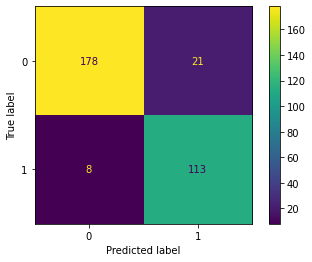

In [38]:
plot_confusion_matrix(dt , x_train, y_train)  
plt.show()

Test Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


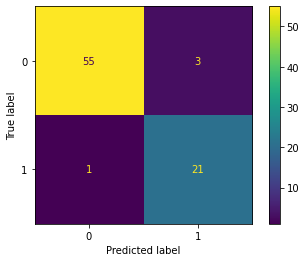

In [39]:
plot_confusion_matrix(dt , x_test, y_test)  
plt.show()

Training data visualization

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.611\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25, 0.5, 'X[1] <= 0.596\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.75, 0.5, 'X[1] <= -0.824\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.362\nsamples = 59\nvalue = [14, 45]')]

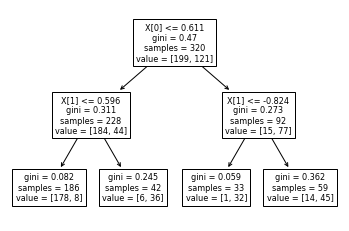

In [40]:
from sklearn import tree
tree.plot_tree(dt)

Test Data Visualization


[Text(0.5, 0.8333333333333334, 'X[0] <= 0.416\ngini = 0.399\nsamples = 80\nvalue = [58, 22]'),
 Text(0.25, 0.5, 'X[1] <= 1.755\ngini = 0.123\nsamples = 61\nvalue = [57, 4]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.065\nsamples = 59\nvalue = [57, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.5, 'X[1] <= -0.534\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

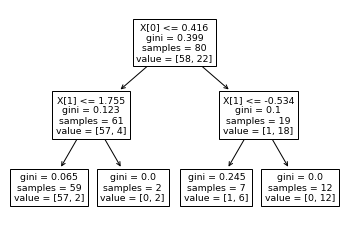

In [41]:
dt = DecisionTreeClassifier(max_depth=2) 
dt.fit(x_test, y_test) 
tree.plot_tree(dt)